In [1]:
import time

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import display
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import (GridSearchCV, ParameterGrid,
                                     RandomizedSearchCV)
from sklearn.metrics import fbeta_score, make_scorer
from tools import (Modelisation, datasets, SearchCV, restauration_CV, 
                   graph_2scores_CV, graph_3scores_CV, graph_param_CV, 
                   best_score_CV)

## Matplotlib : 
# Pour affichage interactif (notamment 3D) dans notebook
# %matplotlib widget

# Pour affichage interactif (notamment 3D) dans une fenêtre qt externe au notebook
# %matplotlib qt

# Pour affichage simple dans notebook
# %config InlineBackend.figure_format = 'png'

t = time.time()

In [2]:
df = pd.read_csv('data/df_train_prepro.csv').sample(frac=1)
df.shape

(1610494, 48)

**Définition des variables quantitatives, des variables catégorielles et des datasets :**

In [3]:
datasets_df = datasets(df)
X_quant = datasets_df['X_quant']
X_cat = datasets_df['X_cat']
X = datasets_df['X']
y = datasets_df['y']

Columns_quant :


['contextid',
 'campaignctrlast24h',
 'dayssincelastvisitdouble',
 'ltf_nbglobaldisplay_4w',
 'ltf_nbpartnerdisplayssincelastclick',
 'ltf_nbpartnerdisplay_90d',
 'ltf_nbpartnerclick_90d',
 'ltf_nbpartnersales_90d',
 'nbdayssincelastclick',
 'nbdisplay_1hour',
 'nbdisplayglobalapprox_1d_sum_xdevice',
 'display_size',
 'zonecostineuro']


Columns_cat :


['display_env',
 'target_env',
 'campaignscenario',
 'campaignvertical',
 'is_interstitial',
 'device_type',
 'hour',
 'weekday']


Nombre de variables pour X_quant : 13



Index(['contextid', 'campaignctrlast24h', 'dayssincelastvisitdouble',
       'ltf_nbglobaldisplay_4w', 'ltf_nbpartnerdisplayssincelastclick',
       'ltf_nbpartnerdisplay_90d', 'ltf_nbpartnerclick_90d',
       'ltf_nbpartnersales_90d', 'nbdayssincelastclick', 'nbdisplay_1hour',
       'nbdisplayglobalapprox_1d_sum_xdevice', 'display_size',
       'zonecostineuro'],
      dtype='object')


Nombre de variables pour X_cat : 50



Index(['display_env_app_ios', 'display_env_other', 'display_env_web',
       'target_env_2', 'campaignscenario_5', 'campaignscenario_6',
       'campaignscenario_11', 'campaignscenario_12', 'campaignscenario_13',
       'campaignscenario_17', 'campaignvertical_20.0', 'campaignvertical_23.0',
       'campaignvertical_129.0', 'campaignvertical_200002.0',
       'is_interstitial_True', 'device_type_Desktop',
       'device_type_Desktop - Safari', 'device_type_Mobile - Other',
       'device_type_Unknown', 'device_type_iPad', 'device_type_iPhone',
       'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7',
       'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12', 'hour_13',
       'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18', 'hour_19',
       'hour_20', 'hour_21', 'hour_22', 'hour_23', 'weekday_Monday',
       'weekday_Saturday', 'weekday_Sunday', 'weekday_Thursday',
       'weekday_Tuesday', 'weekday_Wednesday'],
      dtype='object')


Nombre de variables pour X : 63


Afin de comparer nos modèles en termes de performances brutes et de temps d'exécution, il est fondamental de déterminer quelques métriques de référence. Ici, il faut surtout faire en sorte d'éviter de prédire des non-clics qui seraient en réalité des clics (ie prédire trop de 0), quitte à prédire trop de 1. Autrement dit, il faut maximiser le recall et le NPV (Negative predictive value) afin de limiter les erreurs de type II. Le F1 Score, combinaison du recall et de la précision, est également pertinent. 

# Régression logistique
## Variables quantitatives

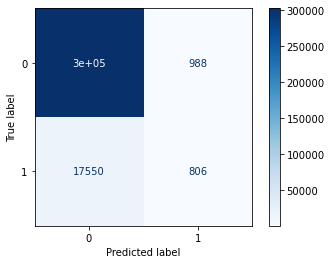

f1 : 0.0800
f3 : 0.0483
f5 : 0.0455
recall : 0.0439
negative predictive value : 0.9452
precision : 0.4493
roc_auc : 0.7401
training time : 2.03s
prediction time : 0.03s


In [4]:
m = Modelisation(X_quant, y, LogisticRegression(), scaling=True)
m.show_conf_matrix()
m.show_metrics_score()

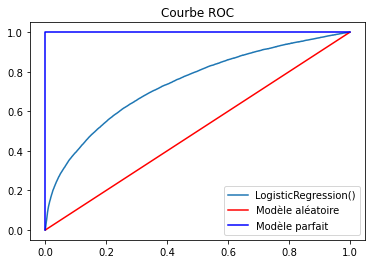

In [5]:
m.show_ROC()

In [6]:
coeff_df = pd.DataFrame(np.transpose(m.model.coef_), X_quant.columns, columns=['Coefficient'])
coeff_df

,Coefficient
contextid,-0.027380
campaignctrlast24h,0.362424
dayssincelastvisitdouble,-0.026968
ltf_nbglobaldisplay_4w,0.007999
ltf_nbpartnerdisplayssincelastclick,-0.024665
ltf_nbpartnerdisplay_90d,-0.011557
ltf_nbpartnerclick_90d,0.036690
ltf_nbpartnersales_90d,-0.011619
nbdayssincelastclick,-0.107144
nbdisplay_1hour,-0.216061


**Problème :** pas de scaling dans la cellule suivante

In [7]:
from statsmodels.discrete.discrete_model import Logit
from statsmodels.tools import add_constant

X_quant_scaled = datasets_df['X_quant_scaled']
X_ = add_constant(X_quant_scaled)
print(Logit(y, X_).fit().summary())

Optimization terminated successfully.
         Current function value: 0.197126
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:     is_display_clicked   No. Observations:              1610494
Model:                          Logit   Df Residuals:                  1610480
Method:                           MLE   Df Model:                           13
Date:                Thu, 25 Feb 2021   Pseudo R-squ.:                 0.09804
Time:                        17:35:41   Log-Likelihood:            -3.1747e+05
converged:                       True   LL-Null:                   -3.5198e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.0405      0.004   -761.677      0.000      -3.048      -3.033
x1            -0.0249      0.

Avec LASSO (+ univariate mais variable déjà exclue par Lasso): 

In [8]:
X1 = df[['contextid',
         'zonecostineuro',
         'campaignctrlast24h',
         'ltf_nbpartnerclick_90d',
         'nbdisplay_1hour',
         'nbdayssincelastclick',
         'display_size',
         'nbdisplayglobalapprox_1d_sum_xdevice']]
y1 = df['is_display_clicked']

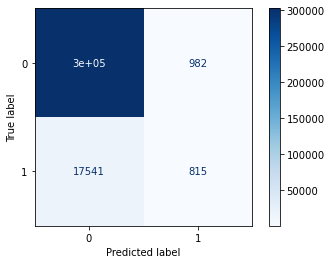

f1 : 0.0809
f3 : 0.0488
f5 : 0.0460
recall : 0.0444
negative predictive value : 0.9452
precision : 0.4535
roc_auc : 0.7400
training time : 1.634s
prediction time : 0.009s


In [9]:
m1 = Modelisation(X1, y1, LogisticRegression(), scaling=True)
m1.show_conf_matrix()
m1.show_metrics_score()

## Variables catégorielles

In [10]:
# Nombre de valeurs distinctes
from tools import COLUMNS_CAT
for column in COLUMNS_CAT:
    print(f"{column} : {len(set(df[column]))}")

display_env : 4
target_env : 2
campaignscenario : 7
campaignvertical : 34
is_interstitial : 3
device_type : 7
hour : 24
weekday : 7


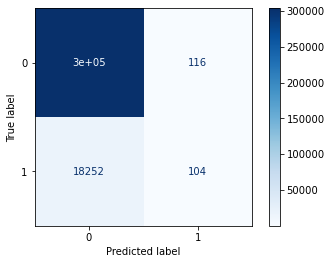

f1 : 0.0112
f3 : 0.0063
f5 : 0.0059
recall : 0.0057
negative predictive value : 0.9433
precision : 0.4727
roc_auc : 0.6878
training time : 4.973s
prediction time : 0.032s


In [11]:
m = Modelisation(X_cat, y, LogisticRegression(), scaling=True)
m.show_conf_matrix()
m.show_metrics_score()

## Variables quantitatives + catégorielles

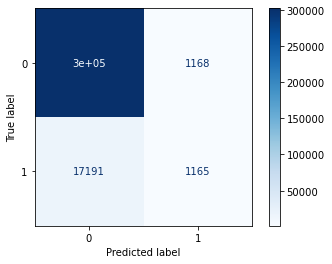

f1 : 0.1126
f3 : 0.0695
f5 : 0.0657
recall : 0.0635
negative predictive value : 0.9462
precision : 0.4994
roc_auc : 0.7571
training time : 6.029s
prediction time : 0.038s


In [12]:
m = Modelisation(X, y, LogisticRegression(), scaling=True)
m.show_conf_matrix()
m.show_metrics_score()

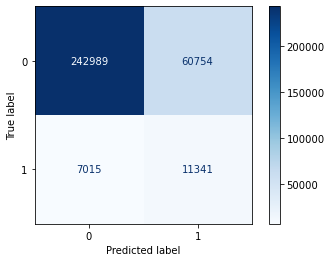

f1 : 0.2508
f3 : 0.4779
f5 : 0.5553
recall : 0.6178
negative predictive value : 0.9719
precision : 0.1573
roc_auc : 0.7781
training time : 5.171s
prediction time : 0.047s


In [13]:
m = Modelisation(X, y, LogisticRegression(class_weight='balanced'), scaling=True)
m.show_conf_matrix()
m.show_metrics_score()

Avec RFECV :

In [14]:
X2 = X[['zonecostineuro',
         'campaignctrlast24h',
         'nbdisplay_1hour',
         'nbdayssincelastclick',
         'display_size',
         'is_interstitial_True',
         'device_type_Desktop',
         'device_type_iPhone',
         'display_env_app_ios',
         'target_env_2',
         'campaignscenario_13']]
y2 = df['is_display_clicked']

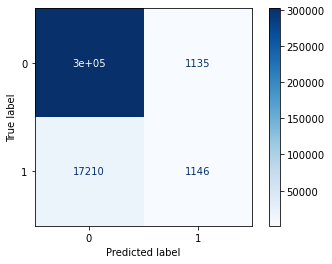

f1 : 0.1111
f3 : 0.0684
f5 : 0.0646
recall : 0.0624
negative predictive value : 0.9462
precision : 0.5024
roc_auc : 0.7541
training time : 1.943s
prediction time : 0.016s


In [15]:
m2 = Modelisation(X2, y2, LogisticRegression(), scaling=True)
m2.show_conf_matrix()
m2.show_metrics_score()

## Comparaison par rapport aux valeurs de C 

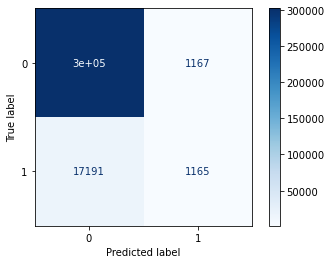

f1 : 0.1126
f3 : 0.0695
f5 : 0.0657
recall : 0.0635
negative predictive value : 0.9462
precision : 0.4996
roc_auc : 0.7571
training time : 7.941s
prediction time : 0.057s


In [16]:
m = Modelisation(X, y, LogisticRegression(C=0.2), scaling=True)
m.show_conf_matrix()
m.show_metrics_score()

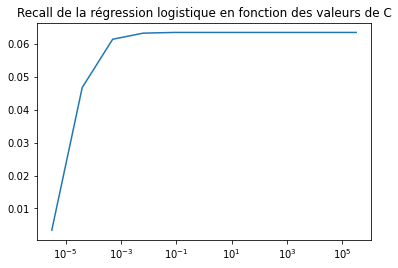

Wall time: 1min 57s


In [17]:
%%time
C, list_recall = [], []
for c in np.logspace(-5.5, 5.5, num=11): 
    m = Modelisation(X, y, LogisticRegression(C=c), scaling=True)
    C.append(c)
    list_recall.append(m.recall)
plt.plot(C, list_recall)
plt.xscale('log')
plt.title("Recall de la régression logistique en fonction des valeurs de C")
plt.show()

## Tuning des hyperparamètres avec GridSearchCV

In [18]:
model = LogisticRegression()

cv_params = {
        "C": np.logspace(-5, 4, 50),
        "class_weight": [None, 'balanced', {0:1, 1:2}, {0:1, 1:4}, {0:1, 1:8}, {0:1, 1:10}, {0:1, 1:12}, {0:1, 1:14}, {0:1, 1:16.5}] 
        }

scoring = {'recall': 'recall',
           'precision': 'precision',
           'f1': 'f1',
           'f3': make_scorer(fbeta_score, beta=3),
           'f5': make_scorer(fbeta_score, beta=5)
          }

print(len(ParameterGrid(cv_params)))

450


In [19]:
# SearchCV(model, cv_params, data_frac=1, scaling=True, scoring=scoring, random=False, n_jobs=56)

In [20]:
dico, results = restauration_CV('LR_CV_Grid_450_1')

model : LogisticRegression()
model_name : LR
type : GridSearchCV
len_grid : 450
data_frac : 1
temps : 00:30:28
params : {'C': array([1.00000000e-05, 1.52641797e-05, 2.32995181e-05, 3.55648031e-05,
       5.42867544e-05, 8.28642773e-05, 1.26485522e-04, 1.93069773e-04,
       2.94705170e-04, 4.49843267e-04, 6.86648845e-04, 1.04811313e-03,
       1.59985872e-03, 2.44205309e-03, 3.72759372e-03, 5.68986603e-03,
       8.68511374e-03, 1.32571137e-02, 2.02358965e-02, 3.08884360e-02,
       4.71486636e-02, 7.19685673e-02, 1.09854114e-01, 1.67683294e-01,
       2.55954792e-01, 3.90693994e-01, 5.96362332e-01, 9.10298178e-01,
       1.38949549e+00, 2.12095089e+00, 3.23745754e+00, 4.94171336e+00,
       7.54312006e+00, 1.15139540e+01, 1.75751062e+01, 2.68269580e+01,
       4.09491506e+01, 6.25055193e+01, 9.54095476e+01, 1.45634848e+02,
       2.22299648e+02, 3.39322177e+02, 5.17947468e+02, 7.90604321e+02,
       1.20679264e+03, 1.84206997e+03, 2.81176870e+03, 4.29193426e+03,
       6.55128557e+03,

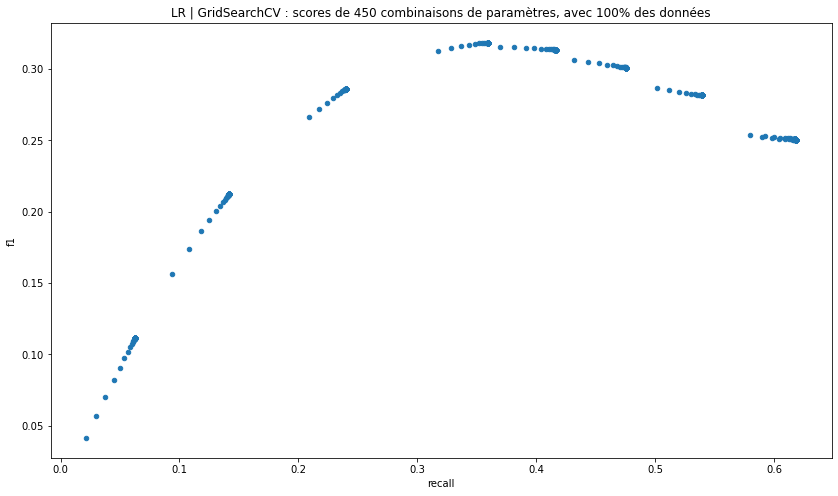

In [21]:
graph_2scores_CV(dico, results, 'recall', 'f1', s=20)

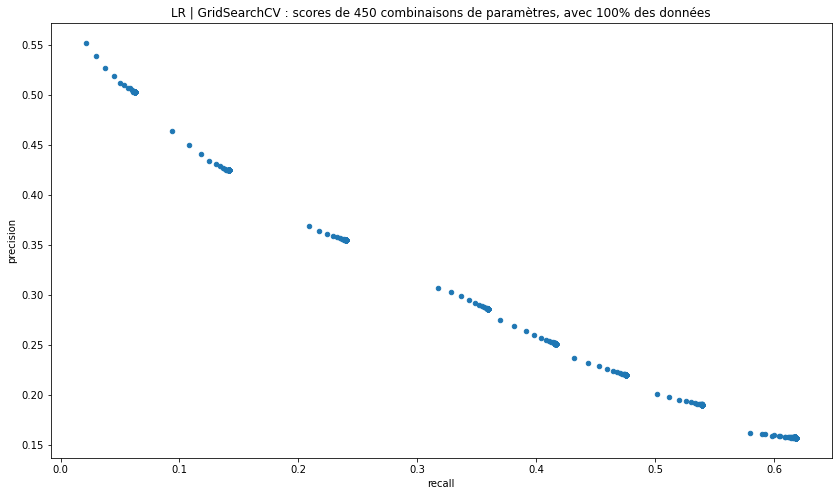

In [22]:
graph_2scores_CV(dico, results, 'recall', 'precision', s=20)

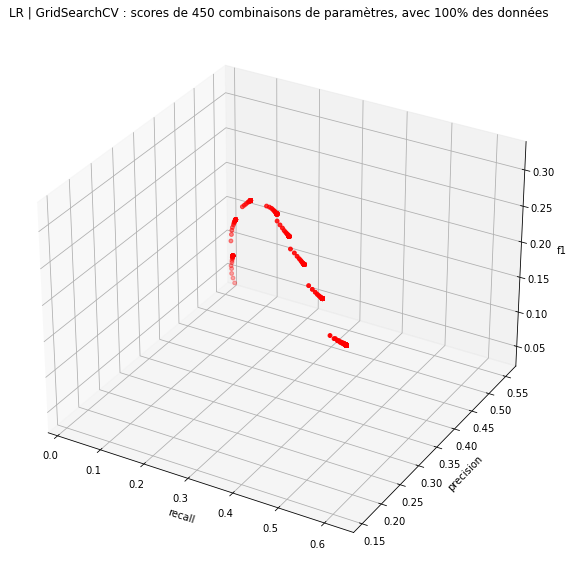

In [23]:
graph_3scores_CV(dico, results, 'recall', 'precision', 'f1', s=15)

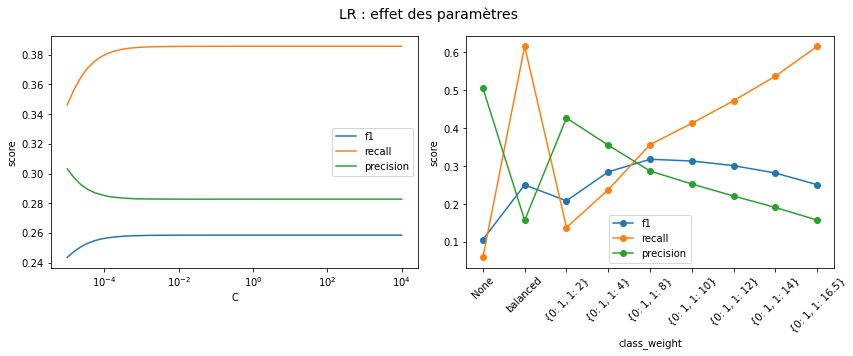

In [24]:
graph_param_CV(dico, results, xscale={'C': 'log'}, ncols=2, height=5, width=6)

In [25]:
best_params = best_score_CV(dico, results, 'recall')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_class_weight,params,mean_test_f1,std_test_f1,rank_test_f1,mean_test_recall,std_test_recall,rank_test_recall,mean_test_precision,std_test_precision,rank_test_precision
217,45.184414,4.09253,1.174197,0.144532,0.255955,balanced,"{'C': 0.2559547922699538, 'class_weight': 'bal...",0.250498,0.001211,340,0.6187,0.002529,1,0.15704,0.000799,444
271,48.309379,3.938691,1.117353,0.09107,3.237458,balanced,"{'C': 3.2374575428176464, 'class_weight': 'bal...",0.250503,0.001207,313,0.6187,0.002505,2,0.157044,0.000797,418
343,49.553187,1.617132,1.177625,0.033219,95.409548,balanced,"{'C': 95.40954763499944, 'class_weight': 'bala...",0.250498,0.0012,324,0.6187,0.002505,2,0.15704,0.000792,429
424,47.089582,3.59971,1.178131,0.190736,4291.93426,balanced,"{'C': 4291.934260128778, 'class_weight': 'bala...",0.250498,0.0012,324,0.6187,0.002505,2,0.15704,0.000792,429
262,46.767541,2.441664,1.122382,0.049587,2.120951,balanced,"{'C': 2.1209508879201926, 'class_weight': 'bal...",0.250501,0.001205,315,0.6187,0.002505,2,0.157043,0.000796,421
280,48.824479,2.942137,1.21658,0.163396,4.941713,balanced,"{'C': 4.941713361323838, 'class_weight': 'bala...",0.250501,0.001205,315,0.6187,0.002505,2,0.157043,0.000796,421
289,46.497169,4.079811,1.118809,0.060934,7.54312,balanced,"{'C': 7.543120063354623, 'class_weight': 'bala...",0.250501,0.001205,315,0.6187,0.002505,2,0.157043,0.000796,421
298,46.661901,3.599573,1.132351,0.027089,11.513954,balanced,"{'C': 11.513953993264481, 'class_weight': 'bal...",0.250499,0.001201,322,0.6187,0.002505,2,0.157041,0.000793,426
307,50.162029,2.054367,1.119693,0.011859,17.575106,balanced,"{'C': 17.57510624854793, 'class_weight': 'bala...",0.250499,0.001201,322,0.6187,0.002505,2,0.157041,0.000793,426
415,48.062257,2.457965,1.119794,0.02748,2811.768698,balanced,"{'C': 2811.7686979742366, 'class_weight': 'bal...",0.250498,0.0012,324,0.6187,0.002505,2,0.15704,0.000792,429


{'C': 0.2559547922699538, 'class_weight': 'balanced'}

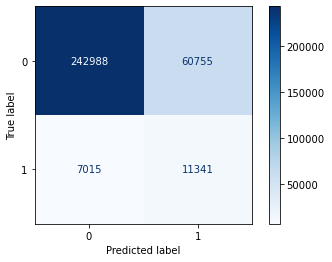

f1 : 0.2508
f3 : 0.4779
f5 : 0.5553
recall : 0.6178
negative predictive value : 0.9719
precision : 0.1573
roc_auc : 0.7781
training time : 7.855s
prediction time : 0.043s


In [26]:
m = Modelisation(X, y, LogisticRegression(**best_params), scaling=True)
m.show_conf_matrix()
m.show_metrics_score()

## Régression logistique sur la base sur-échantillonnée

**/!\ : Seule la base de training est sur-échantillonnée.**

In [27]:
df_train_res = pd.read_csv('data/df_train_res.csv').sample(frac=1)
print(df_train_res.shape)

(2419276, 22)


In [28]:
df_test_res = pd.read_csv('data/df_test_res.csv').sample(frac=1)
print(df_test_res.shape)

(320711, 22)


In [29]:
datasets_df_train_res = datasets(df_train_res, verbose=False)
X_quant_train_res = datasets_df_train_res['X_quant']
X_cat_train_res = datasets_df_train_res['X_cat']
X_train_res = datasets_df_train_res['X']
y_train_res = datasets_df_train_res['y']

In [30]:
datasets_df_test_res = datasets(df_test_res, verbose=False)
X_quant_test_res = datasets_df_test_res['X_quant']
X_cat_test_res = datasets_df_test_res['X_cat']
X_test_res = datasets_df_test_res['X']
y_test_res = datasets_df_test_res['y']

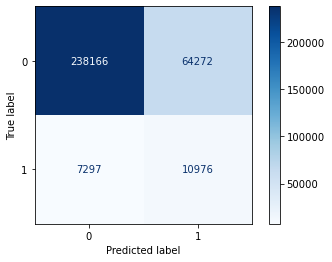

f1 : 0.2347
f3 : 0.4579
f5 : 0.5363
recall : 0.6007
negative predictive value : 0.9703
precision : 0.1459
roc_auc : 0.7550
training time : 14.007s
prediction time : 0.051s


In [31]:
m = Modelisation(X_train_res, y_train_res, LogisticRegression(), X_test=X_test_res, y_test=y_test_res, scaling=True)
m.show_conf_matrix()
m.show_metrics_score()

In [32]:
# SearchCV(model, cv_params, data_frac=1, scaling=True, random=False, csv='data/df_train_res.csv', scoring=scoring, name='res', n_jobs=56)

In [33]:
dico, results = restauration_CV('LR_CV_Grid_450_1_res')

model : LogisticRegression()
model_name : LR
type : GridSearchCV
len_grid : 450
data_frac : 1
temps : 01:07:45
params : {'C': array([1.00000000e-05, 1.52641797e-05, 2.32995181e-05, 3.55648031e-05,
       5.42867544e-05, 8.28642773e-05, 1.26485522e-04, 1.93069773e-04,
       2.94705170e-04, 4.49843267e-04, 6.86648845e-04, 1.04811313e-03,
       1.59985872e-03, 2.44205309e-03, 3.72759372e-03, 5.68986603e-03,
       8.68511374e-03, 1.32571137e-02, 2.02358965e-02, 3.08884360e-02,
       4.71486636e-02, 7.19685673e-02, 1.09854114e-01, 1.67683294e-01,
       2.55954792e-01, 3.90693994e-01, 5.96362332e-01, 9.10298178e-01,
       1.38949549e+00, 2.12095089e+00, 3.23745754e+00, 4.94171336e+00,
       7.54312006e+00, 1.15139540e+01, 1.75751062e+01, 2.68269580e+01,
       4.09491506e+01, 6.25055193e+01, 9.54095476e+01, 1.45634848e+02,
       2.22299648e+02, 3.39322177e+02, 5.17947468e+02, 7.90604321e+02,
       1.20679264e+03, 1.84206997e+03, 2.81176870e+03, 4.29193426e+03,
       6.55128557e+03,

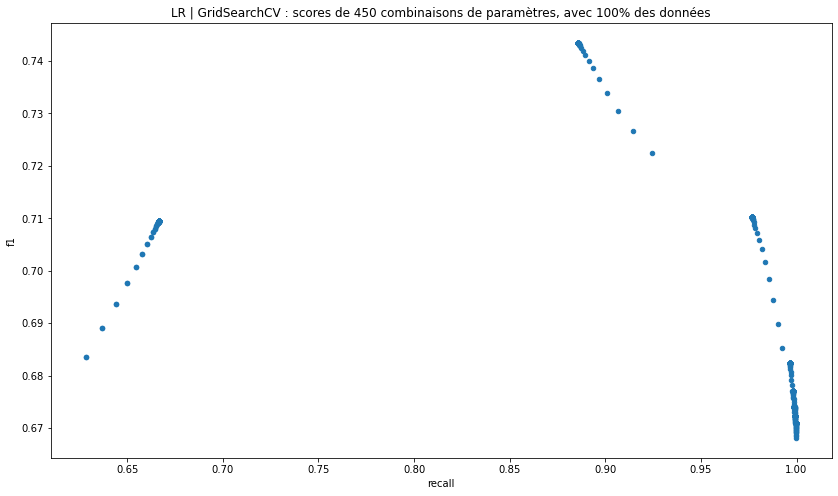

In [34]:
graph_2scores_CV(dico, results, 'recall', 'f1', s=20)

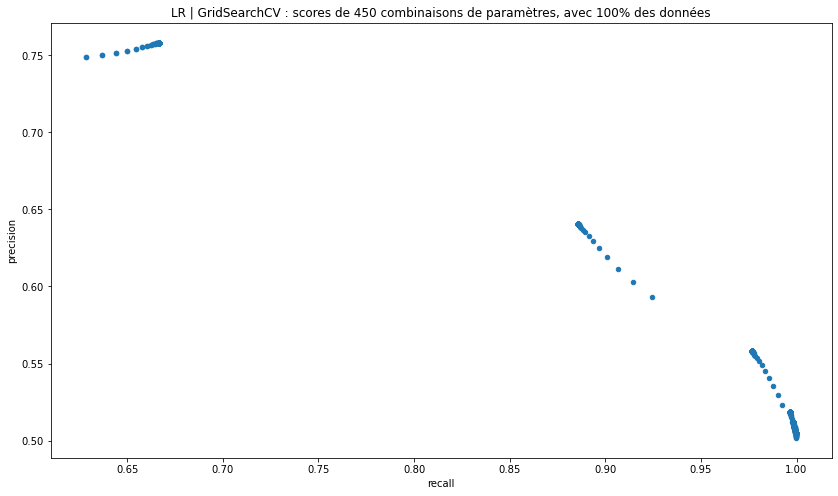

In [35]:
graph_2scores_CV(dico, results, 'recall', 'precision', s=20)

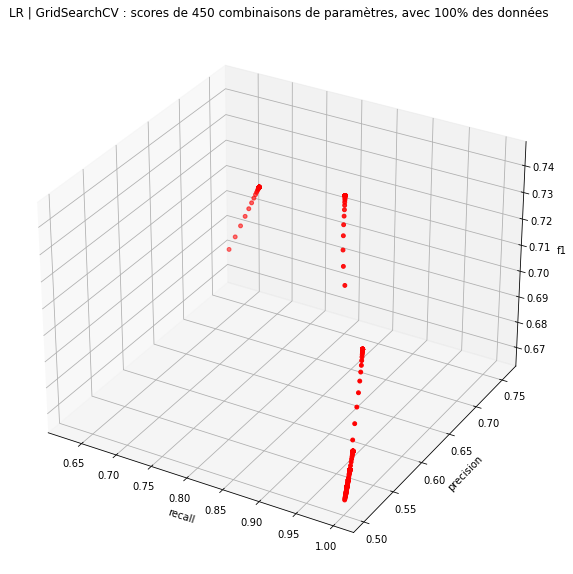

In [36]:
graph_3scores_CV(dico, results, 'recall', 'precision', 'f1', s=15)

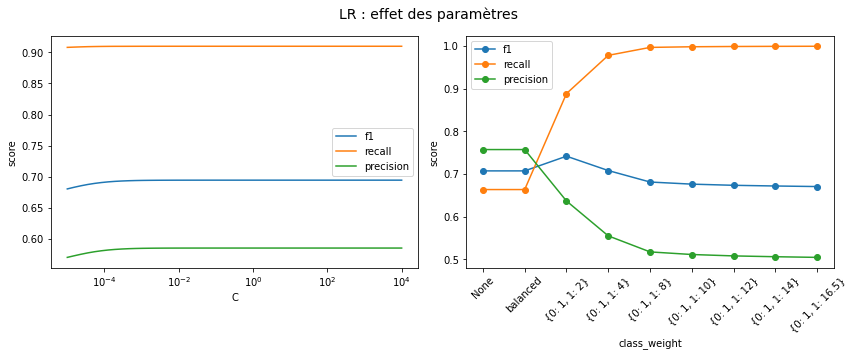

In [37]:
graph_param_CV(dico, results, xscale={'C': 'log'}, ncols=2, height=5, width=6)

In [38]:
best_params = best_score_CV(dico, results, 'recall')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_class_weight,params,mean_test_f1,std_test_f1,rank_test_f1,mean_test_recall,std_test_recall,rank_test_recall,mean_test_precision,std_test_precision,rank_test_precision
8,48.304191,2.935628,1.803304,0.228833,0.00001,"{0: 1, 1: 16.5}","{'C': 1e-05, 'class_weight': {0: 1, 1: 16.5}}",0.668103,0.00007,450,0.999876,0.000021,1,0.501649,0.000081,450
17,61.576055,5.952889,1.702155,0.103926,0.000015,"{0: 1, 1: 16.5}","{'C': 1.5264179671752335e-05, 'class_weight': ...",0.668562,0.000066,449,0.999831,0.000021,2,0.502178,0.000078,449
7,49.928577,1.59891,1.800447,0.224947,0.00001,"{0: 1, 1: 14}","{'C': 1e-05, 'class_weight': {0: 1, 1: 14}}",0.668588,0.000063,448,0.999822,0.000023,3,0.502209,0.000076,448
26,66.09769,3.462116,1.807031,0.115153,0.000023,"{0: 1, 1: 16.5}","{'C': 2.3299518105153718e-05, 'class_weight': ...",0.668999,0.000053,447,0.999778,0.000026,4,0.502684,0.000065,447
16,55.528203,6.03303,1.817489,0.094027,0.000015,"{0: 1, 1: 14}","{'C': 1.5264179671752335e-05, 'class_weight': ...",0.669167,0.000042,446,0.999751,0.000023,5,0.502882,0.000051,446
35,70.548624,2.351724,1.708548,0.104922,0.000036,"{0: 1, 1: 16.5}","{'C': 3.5564803062231284e-05, 'class_weight': ...",0.669383,0.000055,444,0.999744,0.000024,6,0.503127,0.000063,444
6,46.906416,2.954388,1.637583,0.165145,0.00001,"{0: 1, 1: 12}","{'C': 1e-05, 'class_weight': {0: 1, 1: 12}}",0.669178,0.000044,445,0.99974,0.000031,7,0.502896,0.000054,445
44,82.002723,6.040876,1.825192,0.183739,0.000054,"{0: 1, 1: 16.5}","{'C': 5.4286754393238594e-05, 'class_weight': ...",0.669713,0.000062,442,0.999707,0.000025,8,0.503509,0.000071,442
25,66.362673,3.62936,1.693121,0.067554,0.000023,"{0: 1, 1: 14}","{'C': 2.3299518105153718e-05, 'class_weight': ...",0.669692,0.000052,443,0.999692,0.000027,9,0.50349,0.000061,443
53,86.36757,2.751691,1.767646,0.042278,0.000083,"{0: 1, 1: 16.5}","{'C': 8.286427728546843e-05, 'class_weight': {...",0.669999,0.000072,440,0.999665,0.000022,10,0.503843,0.000081,440


{'C': 1e-05, 'class_weight': {0: 1, 1: 16.5}}

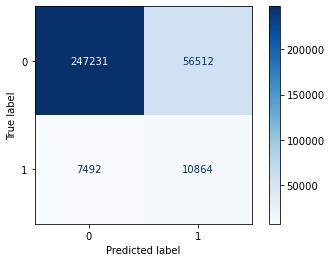

f1 : 0.2534
f3 : 0.4671
f5 : 0.5367
recall : 0.5919
negative predictive value : 0.9706
precision : 0.1612
roc_auc : 0.7740
training time : 3.256s
prediction time : 0.049s


In [39]:
m = Modelisation(X, y, LogisticRegression(**best_params), scaling=True)
m.show_conf_matrix()
m.show_metrics_score()

In [40]:
print(f"Temps d'exécution total : {time.strftime('%H:%M:%S', time.gmtime(time.time()-t))}")

Temps d'exécution total : 00:04:29
